Step 1: Import Libraries

In [3]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy as sp
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.proportion as ssp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from statsmodels.tools.tools import add_constant
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
import patsy
from math import sqrt
import os
os.chdir(r"C:\Users\willi\GitHub\APM_low_infant_birth_wt_PY\data\raw")

In [10]:
# Load Data
birth_wt_data = pd.read_csv("birth_weight_raw.csv")
print("✅ Data loaded successfully")

print(" Data Shape:", birth_wt_data.shape)

✅ Data loaded successfully
 Data Shape: (189, 11)


In [ ]:
# Inspect Data

birth_wt_data.info()
birth_wt_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr_no   189 non-null    float64
 1   id      189 non-null    float64
 2   low     189 non-null    float64
 3   age     189 non-null    float64
 4   lwt     189 non-null    float64
 5   race    189 non-null    float64
 6   smoke   189 non-null    float64
 7   ptl     189 non-null    float64
 8   ht      189 non-null    float64
 9   ui      189 non-null    float64
 10  ftv     189 non-null    float64
dtypes: float64(11)
memory usage: 16.4 KB


,sr_no,id,low,age,lwt,race,smoke,ptl,ht,ui,ftv
0,1.0,85.0,0.0,19.0,182.0,2.0,0.0,0.0,0.0,0.0,0.0
1,2.0,86.0,0.0,33.0,155.0,3.0,0.0,0.0,0.0,0.0,3.0
2,3.0,87.0,0.0,20.0,105.0,1.0,1.0,0.0,0.0,0.0,1.0
3,4.0,88.0,0.0,21.0,108.0,1.0,1.0,0.0,0.0,1.0,2.0
4,5.0,89.0,0.0,18.0,107.0,1.0,1.0,0.0,0.0,1.0,0.0


In [11]:
# Check for missing values
birth_wt_data.isnull().sum()


sr_no    0
id       0
low      0
age      0
lwt      0
race     0
smoke    0
ptl      0
ht       0
ui       0
ftv      0
dtype: int64

Preliminary Data Visulaisation

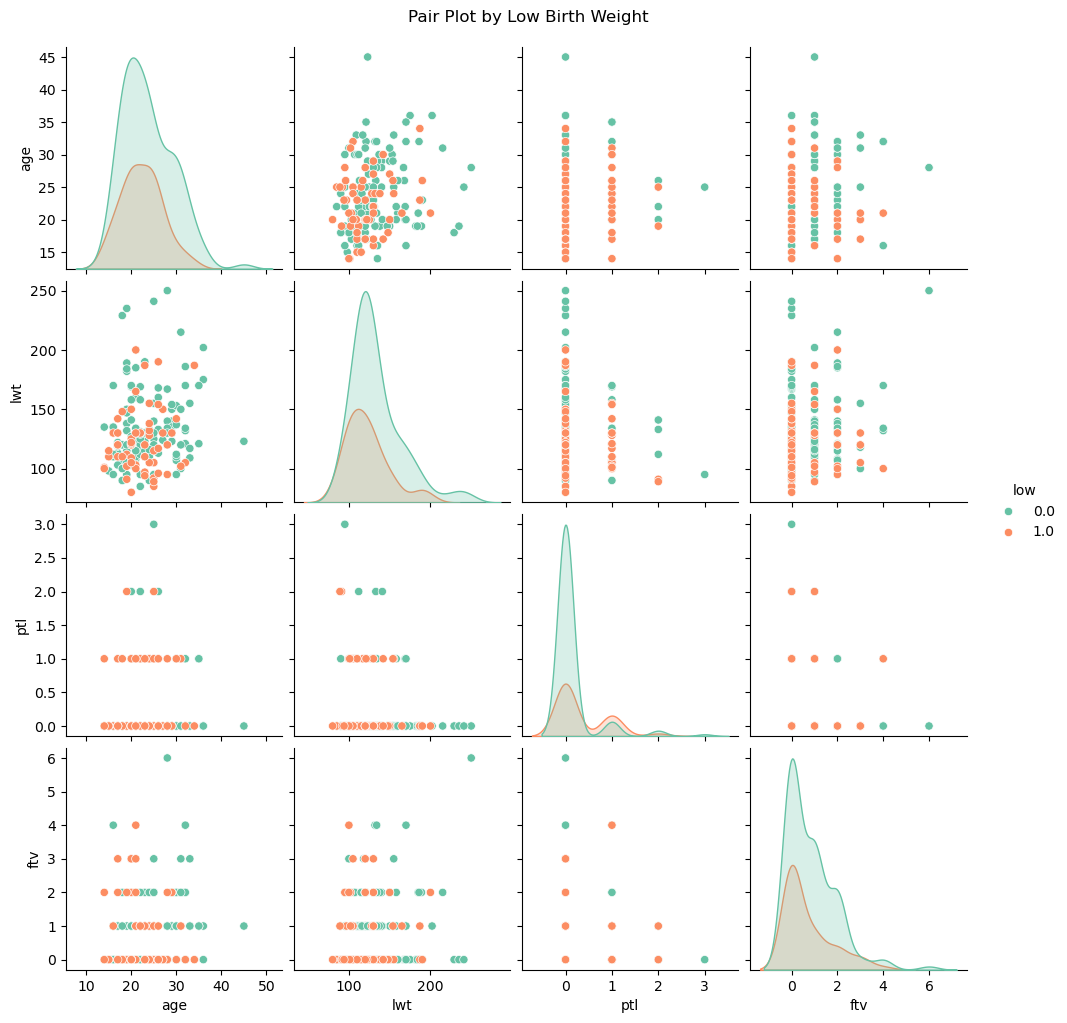

In [13]:
# A: Pair Plot for Numeric Variables Colored by low

# Optional: Limit to key numeric variables
numeric_vars = ['age', 'lwt', 'ptl', 'ftv']
sns.pairplot(birth_wt_data[numeric_vars + ['low']], hue='low', diag_kind='kde', palette='Set2')
plt.suptitle("Pair Plot by Low Birth Weight", y=1.02)
plt.show()


Cross tabulate dependent variable with each independent variable.

In [15]:
def cross_tab_with_perc(var):
    print(f"\n--- Cross Tab: low vs {var} ---")
    ct = pd.crosstab(birth_wt_data['low'], birth_wt_data[var], margins=True)
    print("\nCounts:\n", ct)

    ct_perc = pd.crosstab(birth_wt_data['low'], birth_wt_data[var], normalize='columns') * 100
    print("\nColumn Percentages (%):\n", ct_perc.round(2))

# List of variables to cross-tab
cat_vars = ['race', 'smoke', 'ptl', 'ht', 'ui', 'ftv']

# Run cross tabulation for each
for var in cat_vars:
    cross_tab_with_perc(var)



--- Cross Tab: low vs race ---

Counts:
 race  1.0  2.0  3.0  All
low                     
0.0    73   15   42  130
1.0    23   11   25   59
All    96   26   67  189

Column Percentages (%):
 race    1.0    2.0    3.0
low                      
0.0   76.04  57.69  62.69
1.0   23.96  42.31  37.31

--- Cross Tab: low vs smoke ---

Counts:
 smoke  0.0  1.0  All
low                 
0.0     86   44  130
1.0     29   30   59
All    115   74  189

Column Percentages (%):
 smoke    0.0    1.0
low                
0.0    74.78  59.46
1.0    25.22  40.54

--- Cross Tab: low vs ptl ---

Counts:
 ptl  0.0  1.0  2.0  3.0  All
low                         
0.0  118    8    3    1  130
1.0   41   16    2    0   59
All  159   24    5    1  189

Column Percentages (%):
 ptl    0.0    1.0   2.0    3.0
low                           
0.0  74.21  33.33  60.0  100.0
1.0  25.79  66.67  40.0    0.0

--- Cross Tab: low vs ht ---

Counts:
 ht   0.0  1.0  All
low               
0.0  125    5  130
1.0   52    7   